## 점진적인 학습 이란
##### - 훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라,
##### - 시간 차를 두고 수집이 되는 경우에는 훈련모델 학습은 언제 해야 할까?
##### - 이런 문제를 해결하기 위해 수집될 때 마다 학습을 계속 이어나가는 훈련방식을
##### - "점진적인 학습" 이라고 합니다.
##### --> "점진적인 학습" 또는 온라인 학습이라고 칭함
##### - 대표적인 점진적 학습 알고리즘은 "확률적 경사하강법" 입니다.

## 확률적 경사 하강법(SGD; Stochastic Gradient Descent)
##### - 경사 란 : 우리가 흔히 사용하는 단어인 경사(기울기) 입니다.
##### - 하강법 이란 : 내려가는 방법 입니다.
##### - 경사 하강법 이란 ?
#####  : 원하는 지점에 도달하기 위해 가장 가파른 경사를 따라 내려가는 방법을 찾는 방법
##### - 확률적 이란 : "무작위하게" 또는 "랜덤하게"의 기술적 표현 언어 입니다.
#####  : 훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여 가장 가파른 길을 찾음
## <확률적 경사 하강법 순서>
##### 1. 훈련데이터에서 랜덤하게 하나의 특성을 선택
##### 2. 선택한 특성을 이용하여 경사를 조금씩(아주조금씩) 내려갑니다.
##### 3. 내려 갈 수 있을 때 까지 내려갑니다.
##### 4. 훈련 세트에서 다른 특성을 랜덤하게 또 다시 하나 선택 
##### 4. 선택된 특성을 이용해서 경사를 조금씩 내려갈 수 있을 때 까지 내려간다.

## 1. 데이터 준비하기

In [193]:
import pandas as pd

In [194]:
file_path = "./data/07_fish.csv"
fish = pd.read_csv(file_path)
print(len(fish))
fish.head()

159


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [176]:
# 결측치, 이상치 확인하기
fish.info()
fish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


## 2. 데이터 전처리

In [177]:
### 독립변수와 종속변수 분리하여 변수화
# 독립변수명 : fish_input
# 종속변수명 : fish_target

## 분리시켜 주세요
### 독립변수 입력 데이터 추출(2차원 배열 형태로)
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input.shape)

### 종속변수 입력 데이터 추출(1차원 배열 형태로)
fish_target = fish["Species"].to_numpy()
print(fish_target.shape)

(159, 5)
(159,)


In [178]:
### 훈련(입력, 타겟), 테스트(입력, 타겟) 데이터 분류하기 
### 훈련데이터(입력, 타겟)와 테스트데이터(입력, 타겟) 분류
# 훈련 : 테스트 = 75 : 25
from sklearn.model_selection import train_test_split

# 순서 : 입력 먼저, 타겟 다음
train_input, test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, test_size=0.25, random_state=42)
    
print("훈련-입력", train_input.shape)
print("테스트-입력", test_input.shape)
print("훈련-타겟", train_target.shape)
print("테스트-타겟", test_target.shape)

훈련-입력 (119, 5)
테스트-입력 (40, 5)
훈련-타겟 (119,)
테스트-타겟 (40,)


In [179]:
### 정규화(표준화) -> 독립변수 표준점수로 동일하게 표준화(스케일)
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
# - 타겟 데이터는 절대 변경하면 안됩니다.(정답입니다.)
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

print(train_scaled)
print(test_scaled)

[[ 9.19657820e-01  6.09431747e-01  8.10412209e-01  1.85194896e+00
   1.00075672e+00]
 [ 3.00412188e-01  1.54653445e+00  1.45316551e+00 -4.69816625e-01
   2.72917446e-01]
 [-1.08585360e+00 -1.68646987e+00 -1.70848587e+00 -1.70159849e+00
  -2.00447580e+00]
 [-7.97341433e-01 -6.08801762e-01 -6.74869070e-01 -8.24805885e-01
  -2.76314705e-01]
 [-7.12898847e-01 -7.30625113e-01 -7.00926637e-01 -8.02298036e-02
  -7.03386897e-01]
 [-9.12746301e-01 -9.64900787e-01 -9.52816444e-01 -8.80171862e-01
  -9.91535662e-01]
 [-7.97341433e-01 -7.02512032e-01 -7.61727625e-01 -7.82824547e-01
  -5.44530184e-01]
 [ 6.38182533e-01  5.62576612e-01  7.32239510e-01  1.64473401e+00
   5.07057367e-01]
 [-7.41046376e-01 -6.74398951e-01 -7.35670058e-01 -6.12059278e-01
  -5.57331377e-01]
 [-8.67710255e-01 -7.96222301e-01 -8.92015456e-01 -9.33586942e-01
  -1.02183182e+00]
 [ 8.21141469e-01  7.49997152e-01  6.71438522e-01  4.98470601e-01
   1.47257213e+00]
 [ 3.00412188e-01  2.34590667e-01  4.28234570e-01  1.36042157e+00

## 확률적 경사 하강법을 이용한 분류

In [180]:
### 객체(모델) 생성하기
# - loss : 손실함수 (log=로지스틱 손실함수 사용)
#        : 조금씩 내려오면서 손실이 작은쪽을 찾아서 내려오기 위한 방법
#        : 사람은 손실이 작은 값들을 알 수 없습니다.
#          (학습모델이 가지고 있는 손실 계산식을 통해 결정합니다.)
#        : 분류 결과에 만족한다면, 다 내려왔다고 인정해야 함
#        : 사람이 직접 만들거나 직접 계산하지는 않음(관여하지 않음)
#        : 훈련모델이 직접 수행
#        : 사람은 분류 성격에 맞게 사용할 손실함수를 지정만 합니다.
# - max_iter : 훈련 반복 횟수 
#            (전체 특성이 다 끝나면 1회로 본다 -> 이를 "에포크"라 함)
#        : 훈련 반복 회수가 부족한 경우 다 내려오기 전에 끝..?
#        : 분류 정확도가 낮아질수도(과소적합), 높아질수도(과대적합)
#        : 가장 적합한 반복 시점(에포크)을 찾아야 함..
#          (에포크는 사람이 찾아서 max_iter에 넣어 줄 수 있음)

In [181]:
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

### (해석)
# - 훈련모델의 학습능력이 다소 떨어집니다.
# - 이는 훈련 및 테스트 모두 과소적합을 보인다고 할 수 있음

0.773109243697479
0.775


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [182]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정..(실제로는 새로운 데이터 사용)
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크 반복횟수 찾기

In [183]:
import numpy as np

sc = SGDClassifier(loss="log", random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


In [184]:
print("훈련 정확도 리스트 갯수 = ", len(train_score))
print("테스트 정확도 리스트 갯수 = ", len(test_score))

훈련 정확도 리스트 갯수 =  300
테스트 정확도 리스트 갯수 =  300


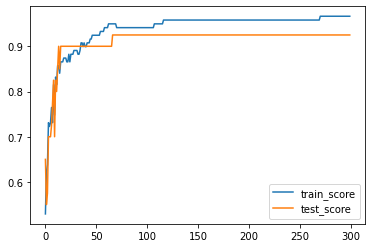

In [185]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

In [186]:
### 최적의 에포크값을 이용해서 처음부터 훈련 시작
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol=None : 훈련모델 스스로 만족하더라도, 훈련 종료하지 못하게하기..
#          : 무조건 100번 반복하기..
sc = SGDClassifier(loss="log", max_iter=100, tol=None, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

### (해석)

0.957983193277311
0.925


## 모델 예측값 데이터프레임에 저장하기

In [187]:
##### [문제]
##### - 새로운 데이터가 수집되었다고 가정하고 예측을 통해 결과값 저장하기
# - 기존 fish 데이터 전체를 신규데이터라고 가정하고 진행
# - 신규 데이터는 Weight, Length, Diagonal, Height, Width
#   (데이터프레임 변수는 별도로 만들어서 사용)

##### - 데이터프레임에 예측결과에 대한 Species_pred 컬럼 추가

##### <출력 결과>
# - Species_pred가 추가된 데이터프레임 출력
#   (출력결과) 데이터프레임의 7개 컬럼 모두 출력
#   Weight, Length, Diagonal, Height, Width, Species, Species_pred

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
#   (출력 예시) 총 갯수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건

# - 정답률과 오답률 출력하기
#   (출력 예시) 총 100.0% 중 정답률[93.71%], 오답률[6.29%]

In [188]:
### 독립변수 특성 데이터만 추출
predict_data = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
predict_data

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [189]:
predict_scaled = ss.transform(predict_data)

In [190]:
### 예측을 통해 "class_pred" 컬럼 신규 생성하여 
# 예측 데이터 결과 확인하기
result_predict = sc.predict(predict_scaled)

fish_pred = fish[['Weight','Length','Diagonal','Height','Width']]
fish_pred["Species"] = fish["Species"]
fish_pred["Species_pred"] = result_predict
fish_pred

,Weight,Length,Diagonal,Height,Width,Species,Species_pred
0,242.0,25.4,30.0,11.5200,4.0200,Bream,Bream
1,290.0,26.3,31.2,12.4800,4.3056,Bream,Bream
2,340.0,26.5,31.1,12.3778,4.6961,Bream,Bream
3,363.0,29.0,33.5,12.7300,4.4555,Bream,Bream
4,430.0,29.0,34.0,12.4440,5.1340,Bream,Bream
...,...,...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936,Smelt,Smelt
155,13.4,12.4,13.5,2.4300,1.2690,Smelt,Smelt
156,12.2,13.0,13.8,2.2770,1.2558,Smelt,Smelt
157,19.7,14.3,15.2,2.8728,2.0672,Smelt,Smelt


In [191]:
### 정답 갯수와 오답 갯수 확인하기
o_cnt = len(fish_pred[(fish_pred["Species"] == fish_pred["Species_pred"])])
o_cnt

x_cnt = len(fish_pred[(fish_pred["Species"] != fish_pred["Species_pred"])])
x_cnt

sum_cnt = len(fish_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

총 갯수[159]건 중에, 정답갯수[151]건, 오답 갯수[8]건


In [192]:
### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 100.0% 중 정답률[94.97%], 오답률[5.03%]
